In [41]:

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [42]:

metadir= "/home/bioinf/Desktop/CODE/INSaFLU-TELEVIR_cml_upload/test_new"
processed_file= os.path.join(metadir, "processed.tsv")

results_dir= "/home/bioinf/Desktop/CODE/INSaFLU-TELEVIR_cml_upload/test_new"
results_file= os.path.join(results_dir, "barcode_01_plots_runs.tsv")

plots_dir= "/home/bioinf/Desktop/CODE/INSaFLU-TELEVIR_cml_upload/test_new/plots"
if not os.path.exists(plots_dir):os.makedirs(plots_dir)


processed_df= pd.read_csv(processed_file, sep="\t")
results_df= pd.read_csv(results_file, sep="\t")

def get_sample_name_from_merged(merged):
    file_name= os.path.basename(merged)
    file_name, ext= os.path.splitext(file_name)
    if ext == ".gz":file_name, ext= os.path.splitext(file_name)

    return file_name

processed_df["sample_name"] = processed_df.apply(lambda x: get_sample_name_from_merged(x["merged"]), axis=1)


results_df["time_elapsed"] = results_df["sample_name"].map(processed_df.set_index("sample_name")["time"])


In [43]:
results_df.head()


,id,run_id,sample_id,reference,unique_id,reference_length,taxid,simple_id,description,ref_db,...,bai_path,reference_path,reference_index_path,reference_assembly_paf,mapped_scaffolds_path,mapped_scaffolds_index_path,project_name,sample_name,leaf_id,time_elapsed
0,6971,973,565,NaN,NC_002017_1,1778,211044,NC_002017_1,Influenza A virus (A/Puerto Rico/8/1934(H1N1))...,/usr/local/web_site/televir/ref_fasta/refseq_v...,...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,NaN,NaN,barcode_01_plots_runs,barcode_01_plots_runs_01-04,147897,53.919603
1,6970,973,565,NaN,NC_002018_1,1413,211044,NC_002018_1,Influenza A virus (A/Puerto Rico/8/1934(H1N1))...,/usr/local/web_site/televir/ref_fasta/refseq_v...,...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,NaN,NaN,barcode_01_plots_runs,barcode_01_plots_runs_01-04,147897,53.919603
2,6969,973,565,NaN,NC_007367_1,1027,335341,NC_007367_1,Influenza A virus (A/New York/392/2004(H3N2)) ...,/usr/local/web_site/televir/ref_fasta/refseq_v...,...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,NaN,NaN,barcode_01_plots_runs,barcode_01_plots_runs_01-04,147897,53.919603
3,6968,973,565,NaN,NC_007369_1,1566,335341,NC_007369_1,Influenza A virus (A/New York/392/2004(H3N2)) ...,/usr/local/web_site/televir/ref_fasta/refseq_v...,...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,NaN,NaN,barcode_01_plots_runs,barcode_01_plots_runs_01-04,147897,53.919603
4,6967,973,565,NaN,NC_002016_1,1027,211044,NC_002016_1,Influenza A virus (A/Puerto Rico/8/1934(H1N1))...,/usr/local/web_site/televir/ref_fasta/refseq_v...,...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,/usr/local/web_site/INSaFLU/static_all/televir...,NaN,NaN,barcode_01_plots_runs,barcode_01_plots_runs_01-04,147897,53.919603


In [30]:
results_df.columns


Index(['id', 'run_id', 'sample_id', 'reference', 'unique_id',
       'reference_length', 'taxid', 'simple_id', 'description', 'ref_db',
       'reference_contig_str', 'accid', 'coverage', 'windows_covered', 'depth',
       'depthR', 'mapped_reads', 'ref_proportion', 'mapped_proportion',
       'ngaps', 'mapping_success', 'classification_success', 'refa_dotplot',
       'refa_dotplot_exists', 'covplot', 'covplot_exists', 'bam_path',
       'bai_path', 'reference_path', 'reference_index_path',
       'reference_assembly_paf', 'mapped_scaffolds_path',
       'mapped_scaffolds_index_path', 'project_name', 'sample_name',
       'time_elapsed'],
      dtype='object')

In [55]:
stats= ["coverage", "depth", "ref_proportion"]
sample_names= results_df["sample_name"].unique()
accids= results_df["accid"].unique()
def get_sample_runs(sample_name, results_df):
    sample_df= results_df[results_df["sample_name"]==sample_name]
    return sample_df["run_id"].unique()

## get accid stats by sample

accid_stats= pd.DataFrame()

for accid in accids:
    accid_df= pd.DataFrame()
    for sample_name in sample_names:
        runs= get_sample_runs(sample_name, results_df)
        print(runs)

        sample_df= results_df[results_df["sample_name"]==sample_name]
        time_elapsed= sample_df["time_elapsed"].unique()[0]
        description= sample_df["description"].unique()[0]
        sample_df= sample_df[sample_df["accid"]==accid]

    
        if sample_df.shape[0] == 0:
            sample_stat= pd.DataFrame({ "coverage": [np.nan], "depth": [np.nan], "ref_proportion": [np.nan], "description": [description], "time_elapsed": [time_elapsed]})
        else:
            sample_stat= sample_df[
                [
                    "coverage", 
                    "depth", 
                    "ref_proportion", 
                    "description", 
                    "time_elapsed", 
                    "leaf_id"]
                ]
            
        sample_stat.insert(0, "accid", accid)
        sample_stat.insert(0, "sample_name", sample_name)

        accid_stats= pd.concat([accid_stats, sample_stat])




[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 976 974]
[968 970 969]
[967 966 965]
[977 978 979]
[973 972 971]
[975 9

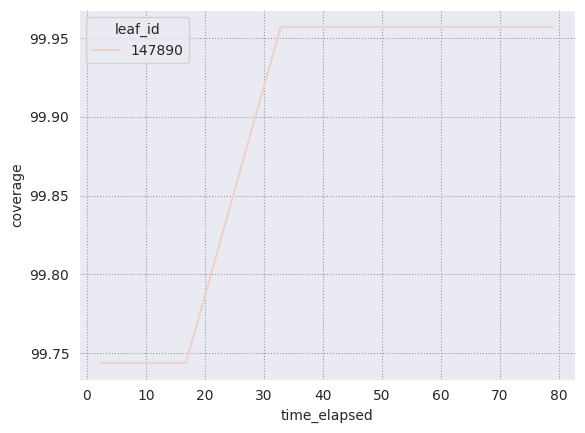

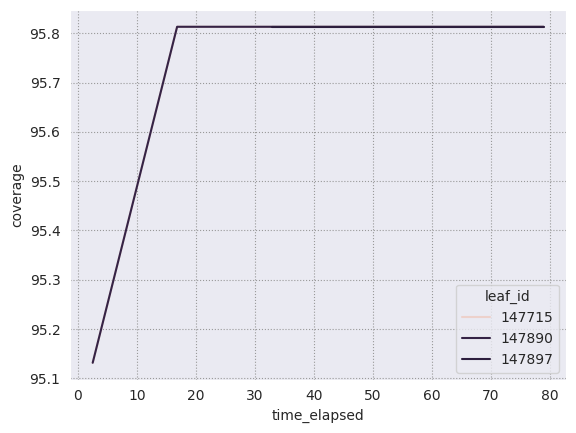

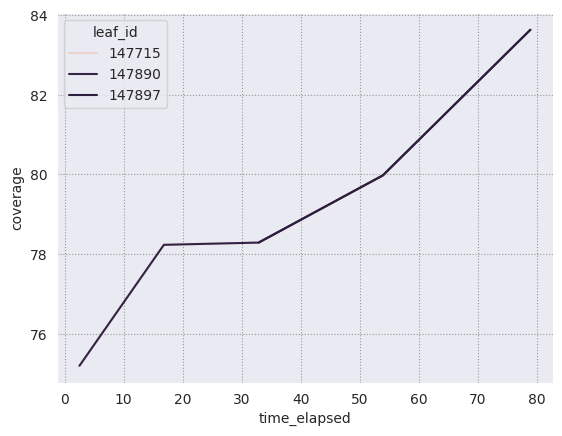

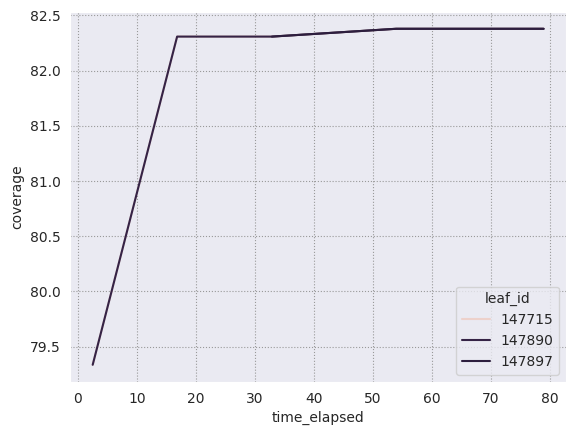

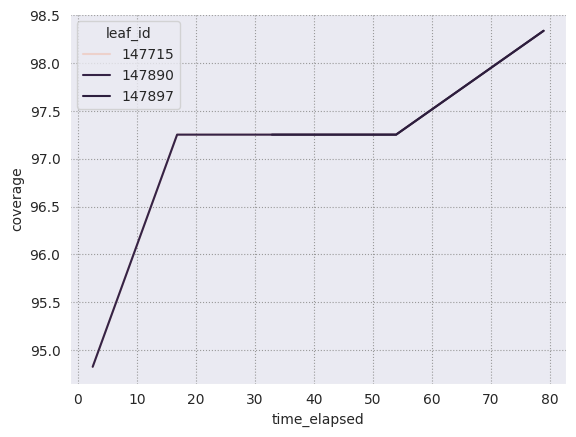

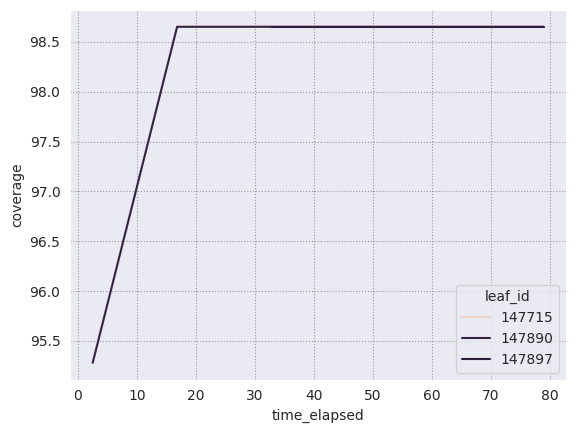

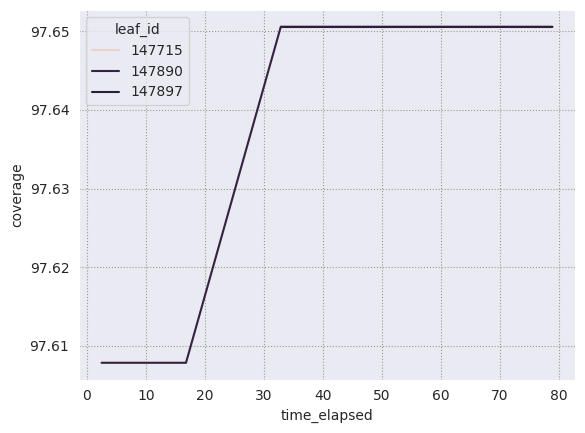

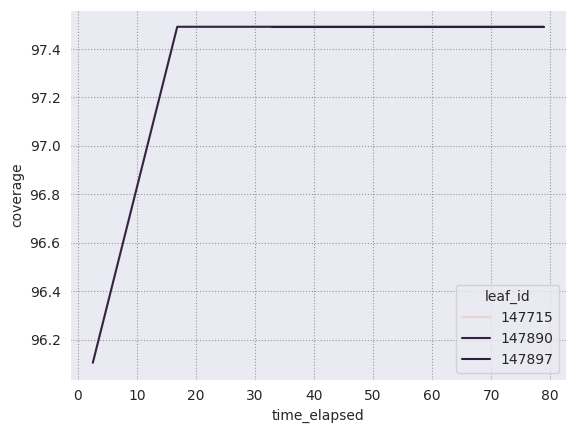

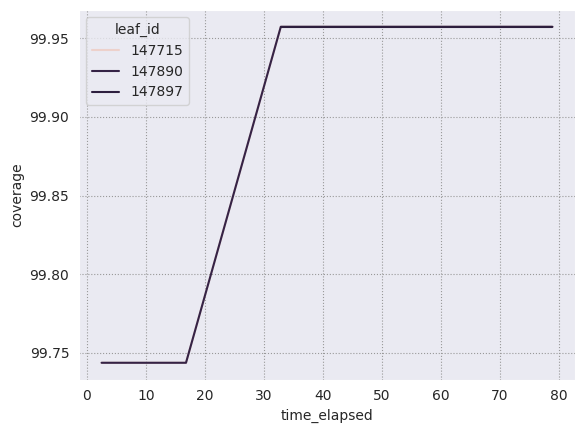

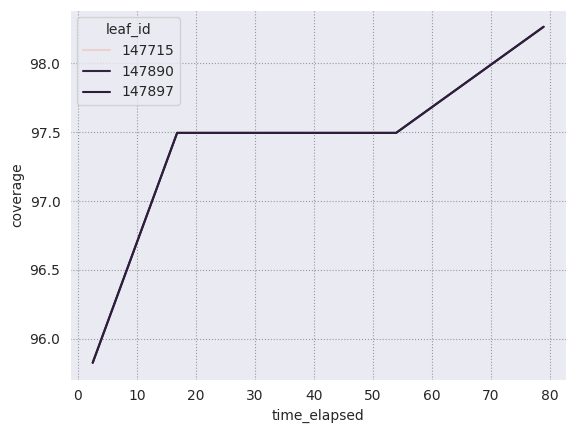

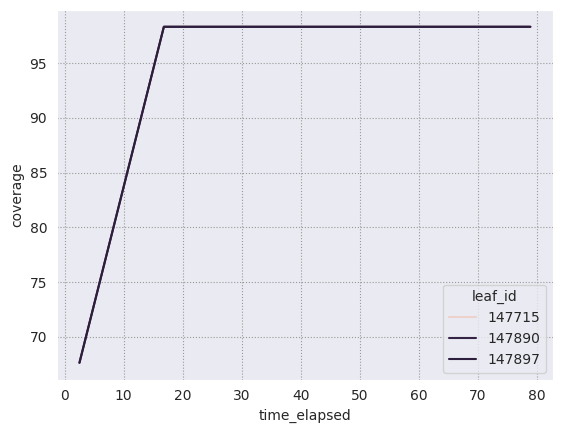

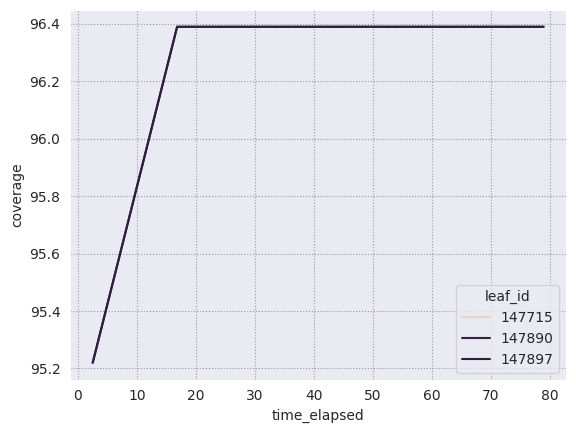

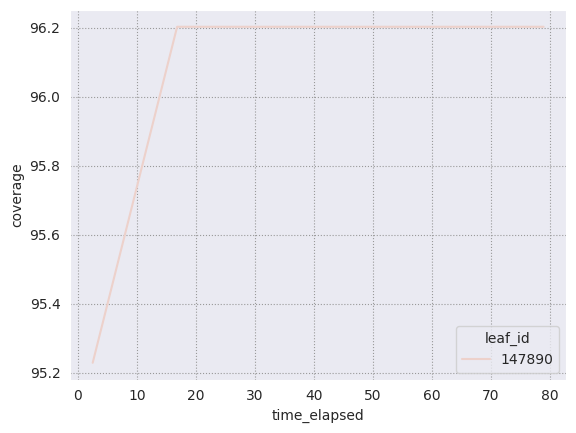

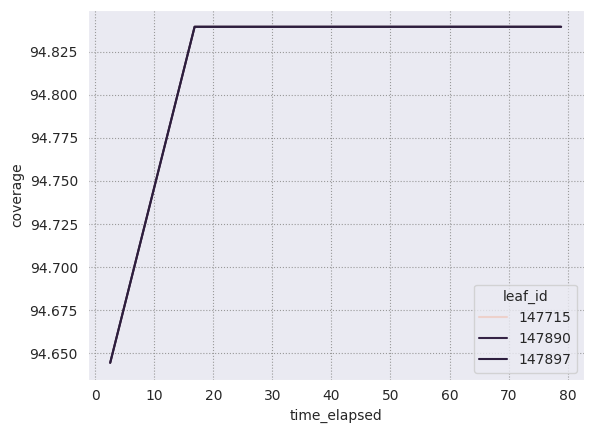

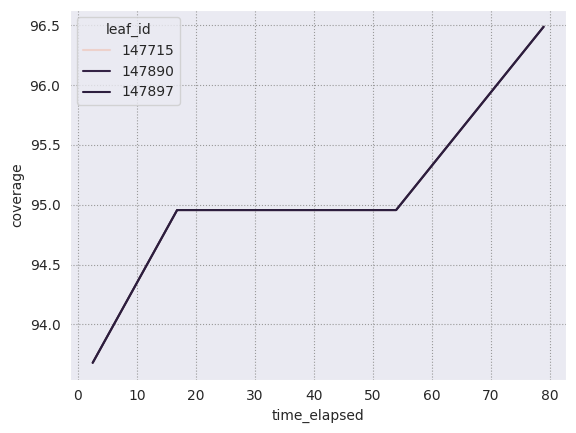

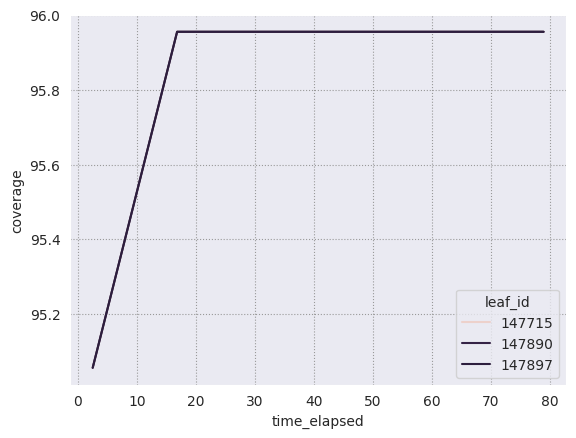

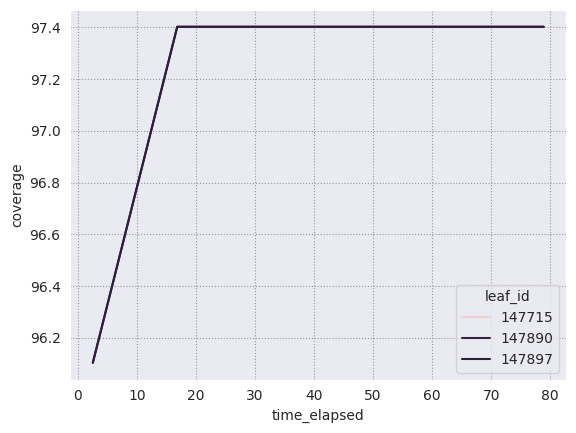

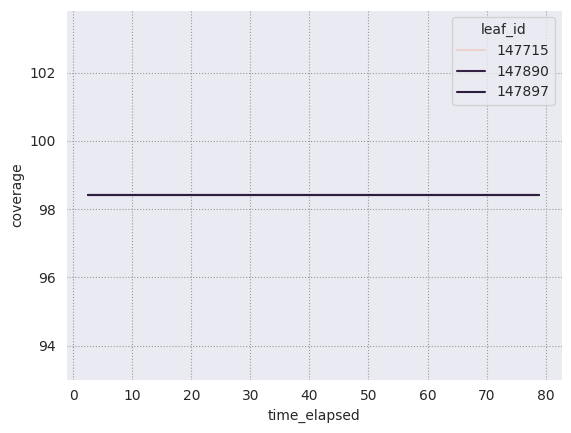

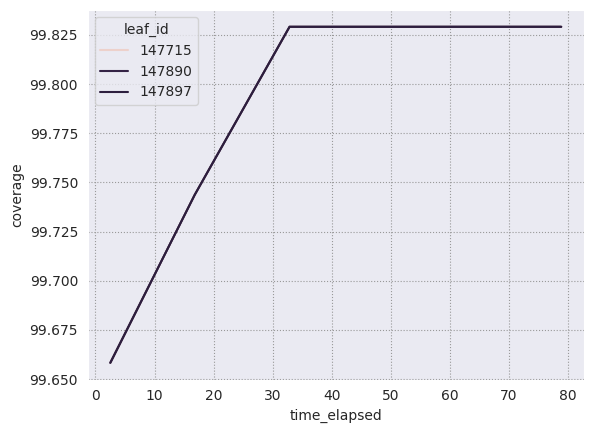

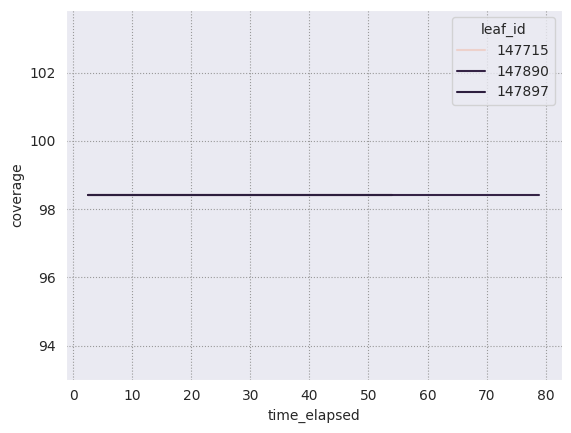

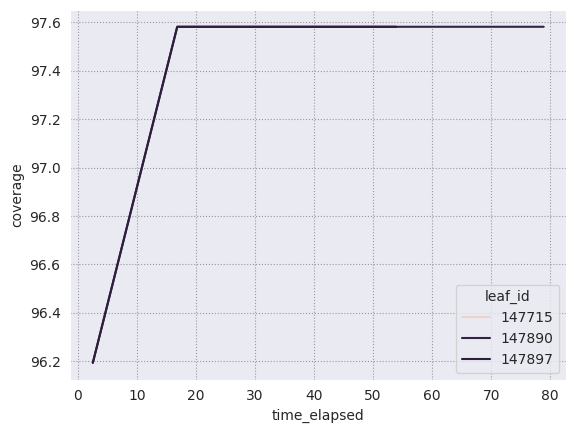

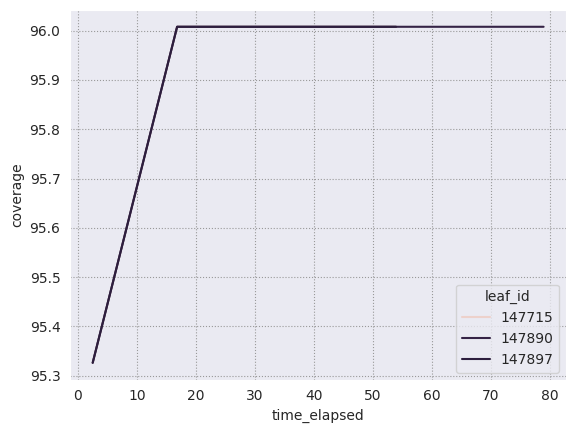

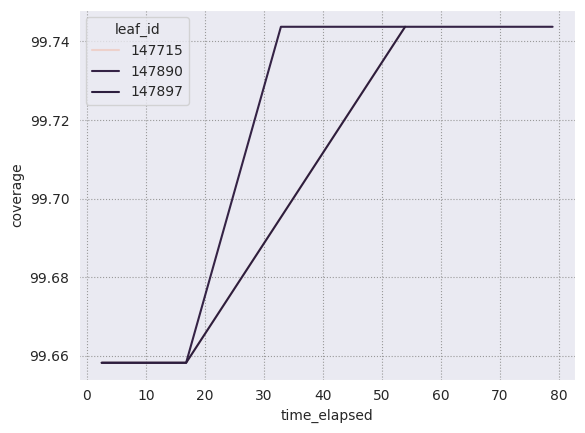

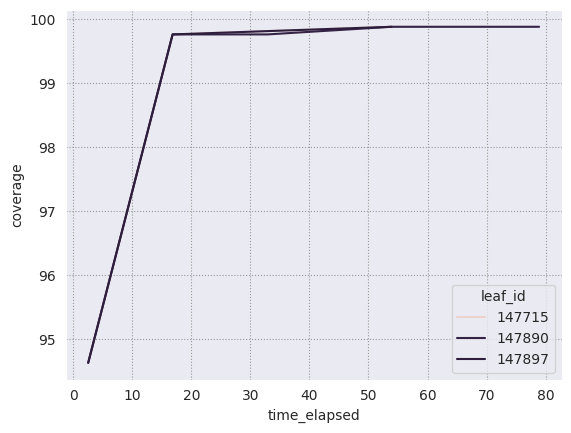

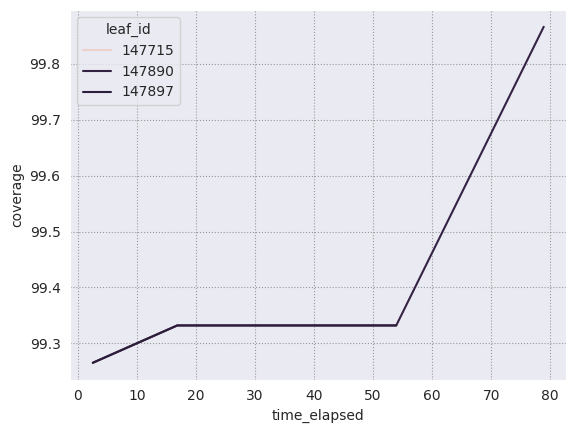

In [56]:
stat= "coverage"
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

for accid, df in accid_stats.groupby("accid"):

    sns.lineplot(x="time_elapsed", y=stat, hue="leaf_id", data=df)
    plt.show()

    plt.savefig(os.path.join(plots_dir, f"{accid}_{stat}.png"))

    plt.close()
    


In [21]:
processed_df.head()


,sample_id,fastq,dir,barcode,time,merged,sample_name
0,barcode_01_plots,test_data_01.fastq.gz,test_run/barcode_01,1,2.342140,test_new/barcode_01/merged_files/barcode_01_pl...,barcode_01_plots_01-01
1,barcode_01_plots,test_data_02.fastq.gz,test_run/barcode_01,2,17.584963,test_new/barcode_01/merged_files/barcode_01_pl...,barcode_01_plots_01-02
2,barcode_01_plots,test_data_03.fastq.gz,test_run/barcode_01,3,40.282125,test_new/barcode_01/merged_files/barcode_01_pl...,barcode_01_plots_01-03
3,barcode_01_plots,test_data_04.fastq.gz,test_run/barcode_01,4,61.990762,test_new/barcode_01/merged_files/barcode_01_pl...,barcode_01_plots_01-04
4,barcode_01_plots,test_data_05.fastq.gz,test_run/barcode_01,5,90.268560,test_new/barcode_01/merged_files/barcode_01_pl...,barcode_01_plots_01-05
